In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import csv
from ast import literal_eval
import pandas as pd

In [2]:
data = pd.read_csv("dt_h.csv", sep=",")
data.head(5)

,type 0,type 1,type 2,type 3,type 4,type 5,type 6,type 7,type 8,type 9,...,type 30,type 31,type 32,type 33,type 34,type 35,type 36,type 37,type 38,type 39
0,4,4,5,4,5,4,4,7,11,4,...,154,162,184,174,196,174,182,210,214,233
1,8,8,14,16,23,23,42,25,44,21,...,38,33,40,60,51,62,69,70,76,82
2,9,12,33,9,27,21,9,13,12,20,...,51,57,58,55,54,57,62,63,76,82
3,3,3,4,3,3,3,4,7,10,15,...,14,22,26,29,26,16,31,48,58,78
4,23,4,17,13,13,25,5,6,16,19,...,48,45,54,58,52,48,89,131,120,160


In [101]:
data.shape[1]
data.iloc[0]

type 0     0.029851
type 1     0.037736
type 2     0.048387
type 3     0.032787
type 4     0.067797
type 5     0.037975
type 6     0.020000
type 7     0.048780
type 8     0.072727
type 9     0.010526
type 10    0.008197
type 11    0.069444
type 12    0.049645
type 13    0.019737
type 14    0.056338
type 15    0.192771
type 16    0.343137
type 17    0.292576
type 18    0.512931
type 19    0.516393
type 20    0.356784
type 21    0.262097
type 22    0.321101
type 23    0.316038
type 24    0.556034
type 25    0.400862
type 26    0.243119
type 27    0.214286
type 28    0.288703
type 29    0.281124
type 30    0.617284
type 31    0.659751
type 32    0.731707
type 33    0.779817
type 34    0.780488
Name: 0, dtype: float64

In [6]:
type = ["type %d"%i for i in range(data.shape[1])]
type_x = ["type %d"%i for i in range(data.shape[1]-5)]
type_y = ["type %d"%i for i in range(data.shape[1]-1,data.shape[1]-6,-1)]

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = type
df_scaled = scaler.fit_transform(data[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

      type 0    type 1    type 2    type 3    type 4    type 5  type 6  \
0   0.029851  0.037736  0.048387  0.032787  0.067797  0.037975    0.02   
1   0.089552  0.113208  0.193548  0.229508  0.372881  0.278481    0.40   
2   0.104478  0.188679  0.500000  0.114754  0.440678  0.253165    0.07   
3   0.014925  0.018868  0.032258  0.016393  0.033898  0.025316    0.02   
4   0.313433  0.037736  0.241935  0.180328  0.203390  0.303797    0.03   
..       ...       ...       ...       ...       ...       ...     ...   
95  0.253731  0.000000  0.290323  0.245902  0.288136  0.341772    0.08   
96  0.358209  0.660377  0.709677  0.918033  0.779661  0.822785    0.20   
97  0.164179  0.283019  0.016129  0.360656  0.322034  0.379747    0.51   
98  0.134328  0.188679  0.080645  0.196721  0.661017  0.506329    0.47   
99  0.119403  0.169811  0.016129  0.196721  0.542373  0.481013    0.51   

      type 7    type 8    type 9  ...   type 30   type 31   type 32   type 33  \
0   0.048780  0.072727  0.0105

In [43]:
train = df_scaled[:80]
test = df_scaled[80:]

In [44]:
def make_dataset(data, label, window_size = 35):
    feature_list = []
    label_list = []
#     for i in range(len(data) - window_size):
#         feature_list.append(np.array(data.iloc[i:i+window_size]))
#         label_list.append(np.array(label.iloc[i+window_size]))
    for i in range(data.shape[0]):
        feature_list.append(np.array(data.iloc[i]))
        label_list.append(np.array(label.iloc[i]))
    
    return np.array(feature_list), np.array(label_list)

In [45]:
# feature_cols = type_x
# train_feature = train[feature_cols]

# data = train_feature

# for i in range(len(type_x)):
#     feature_list.append(np.array(data.iloc[i]))
# for i in range(len(type_y)):
#     label_list.append(np.array(label.iloc[i]))

In [62]:
feature_cols = type_x
label_cols = type_y

train_feature = train[feature_cols]
train_label = train[label_cols]


train_feature, train_label = make_dataset(train_feature, train_label, 35)

train_feature = train_feature.reshape(train_feature.shape[0],train_feature.shape[1],1)
train_label = train_label.reshape(train_label.shape[0],train_label.shape[1],1)
# print(train_label.shape)

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.1)

x_train.shape, x_valid.shape

((72, 35, 1), (8, 35, 1))

In [63]:
train_feature[1]

array([[0.08955224],
       [0.11320755],
       [0.19354839],
       [0.2295082 ],
       [0.37288136],
       [0.27848101],
       [0.4       ],
       [0.26829268],
       [0.37272727],
       [0.18947368],
       [0.05737705],
       [0.16666667],
       [0.32624113],
       [0.25      ],
       [0.11737089],
       [0.13253012],
       [0.21078431],
       [0.069869  ],
       [0.09051724],
       [0.08196721],
       [0.13567839],
       [0.14516129],
       [0.06880734],
       [0.04245283],
       [0.15948276],
       [0.0862069 ],
       [0.14678899],
       [0.15873016],
       [0.12133891],
       [0.06827309],
       [0.1399177 ],
       [0.12448133],
       [0.14634146],
       [0.25688073],
       [0.19105691]])

In [64]:
train_feature.shape

(80, 35, 1)

In [71]:
test_feature = test[feature_cols]
test_label = test[label_cols]

In [72]:
test_feature, test_label = make_dataset(test_feature,test_label)

test_feature = test_feature.reshape(test_feature.shape[0],test_feature.shape[1],1)
test_label = test_label.reshape(test_label.shape[0],test_label.shape[1],1)

test_feature.shape, test_label.shape

((20, 35, 1), (20, 5, 1))

In [85]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16,
              input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False)
              )
model.add(Dense(5))

In [86]:
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(x_train, y_train,
                   epochs=200,
                   batch_size=16,
                   validation_data=(x_valid, y_valid)
                   )

Epoch 1/200
5/5 [==============================] - 0s 60ms/step - loss: 0.0685 - val_loss: 0.1484
Epoch 2/200
5/5 [==============================] - 0s 31ms/step - loss: 0.0628 - val_loss: 0.1368
Epoch 3/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0589 - val_loss: 0.1258
Epoch 4/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0536 - val_loss: 0.1154
Epoch 5/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0501 - val_loss: 0.1051
Epoch 6/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0461 - val_loss: 0.0963
Epoch 7/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0427 - val_loss: 0.0876
Epoch 8/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0394 - val_loss: 0.0783
Epoch 9/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0366 - val_loss: 0.0677
Epoch 10/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0330 - val_loss: 0.0566
Epoch 11/200
5/5 [=

Epoch 84/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0068 - val_loss: 0.0034
Epoch 85/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0066 - val_loss: 0.0035
Epoch 86/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0065 - val_loss: 0.0037
Epoch 87/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0065 - val_loss: 0.0036
Epoch 88/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0065 - val_loss: 0.0033
Epoch 89/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0063 - val_loss: 0.0038
Epoch 90/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0062 - val_loss: 0.0040
Epoch 91/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0061 - val_loss: 0.0039
Epoch 92/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0060 - val_loss: 0.0040
Epoch 93/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0059 - val_loss: 0.0040
Epoch 94/2

5/5 [==============================] - 0s 29ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 167/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 168/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 169/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 170/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 171/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 172/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 173/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 174/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 175/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 176/200


In [152]:
pred = model.predict(test_feature)

pred

array([[0.50901055, 0.43378484, 0.4797234 , 0.40338537, 0.3793301 ],
       [0.28229868, 0.24665318, 0.24411806, 0.21742359, 0.19414984],
       [0.25724798, 0.22006829, 0.2178936 , 0.19952506, 0.17374346],
       [0.14087708, 0.12029758, 0.11228671, 0.11484311, 0.11188403],
       [0.72036487, 0.64754754, 0.7122874 , 0.5946602 , 0.5411418 ],
       [1.0023255 , 0.8026165 , 0.95851195, 0.8364597 , 0.8157052 ],
       [0.59465414, 0.5090073 , 0.56888855, 0.47605416, 0.45085552],
       [0.27536052, 0.24214341, 0.2425052 , 0.21176288, 0.18524462],
       [0.25851172, 0.22913386, 0.227106  , 0.1988999 , 0.17527305],
       [1.0243554 , 0.8186212 , 0.98324704, 0.85826075, 0.8350948 ],
       [1.0144542 , 0.8129607 , 0.9721383 , 0.84502393, 0.8230665 ],
       [0.45307487, 0.3793493 , 0.39728394, 0.34241432, 0.32865524],
       [0.31381917, 0.2747877 , 0.27432418, 0.2380749 , 0.21678509],
       [0.4176649 , 0.34763733, 0.37997317, 0.33635935, 0.3149432 ],
       [1.0807344 , 0.8171055 , 1.

In [147]:
print(test_feature.shape)

test_label = test_label.reshape(test_label.shape[0],test_label.shape[1])
print(test_label.shape)

print(pred.shape)

(20, 35, 1)
(20, 5)
(20, 5)


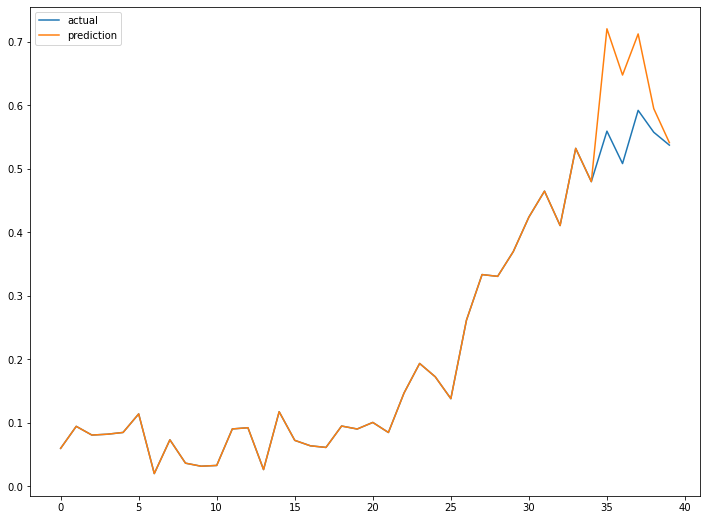

In [198]:
plt.figure(figsize=(12,9))
#plt.plot(test_label[4], label='actual')
#plt.plot(test_feature[4], label='actual')
#plt.plot(pred[4], label='prediction')
plt.plot(z1, label='actual')
plt.plot(z2, label='prediction')
plt.legend()
plt.show()

In [187]:
tl = test_label.reshape(test_label.shape[0],test_label.shape[1],1)
pl = pred.reshape(pred.shape[0],pred.shape[1],1)
print(test_feature.shape)
print(pred.shape)
# p = test_feature + pred

(20, 35, 1)
(20, 5)


In [197]:
z1 = np.concatenate((test_feature[4],tl[4]))
z2 = np.concatenate((test_feature[4],pl[4]))

AttributeError: 'list' object has no attribute 'shape'